In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from myst_nb import glue

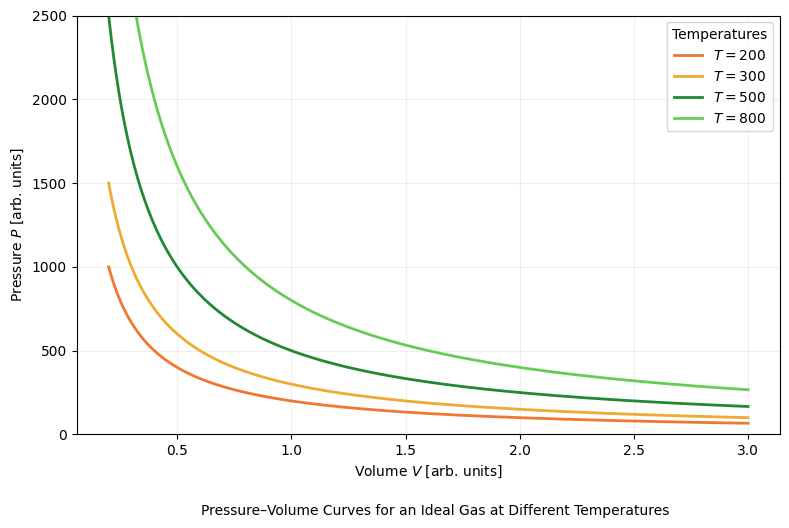

In [2]:
OG_COLORS = ["#EE7733", "#EEAA33", "#228833", "#66CC55"]

V = np.linspace(0.2, 3, 500)
temperatures = [200, 300, 500, 800]
n = 1
R = 1

plt.figure(figsize=(8, 5))

for T, col in zip(temperatures, OG_COLORS):
    P = n * R * T / V
    plt.plot(V, P, color=col, linewidth=2, label=f"$T = {T}$")

plt.ylim(0, 2500)
plt.xlabel("Volume $V$ [arb. units]")
plt.ylabel("Pressure $P$ [arb. units]")
plt.legend(title="Temperatures", loc="upper right")
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55, y=-0.04,
    s="Pressure–Volume Curves for an Ideal Gas at Different Temperatures",
    ha="center"
)

plt.show()

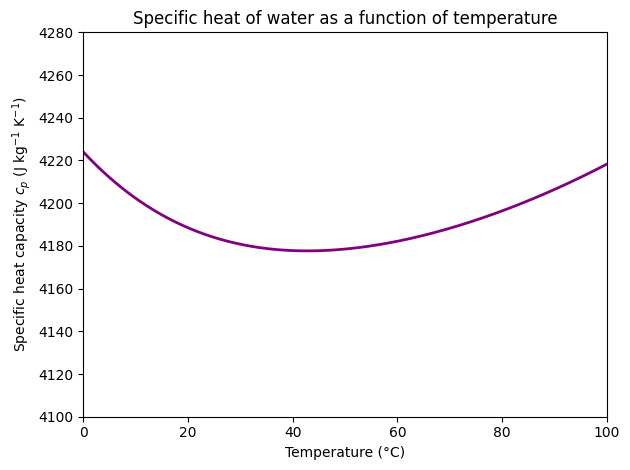

In [10]:
M_WATER = 0.01801528

A = -203.6060
B = 1523.290
C = -3196.413
D = 2474.455
E = 3.855326

def cp_water_mass(T_celsius):
    """
    Specific heat capacity of liquid water at 1 bar as a function of temperature.
    Input:  T_celsius (float or array), temperature in °C
    Output: cp in J/(kg·K)
    """
    T_kelvin = T_celsius + 273.15
    t = T_kelvin / 1000.0

    cp_molar = A + B*t + C*t**2 + D*t**3 + E / (t**2)  # J/mol/K
    return cp_molar / M_WATER                           # J/kg/K

T = np.linspace(0.0, 100.0, 500)
cp = cp_water_mass(T)

fig, ax = plt.subplots()

ax.plot(T, cp, lw=2, color="purple")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel(r"Specific heat capacity $c_p$ (J kg$^{-1}$ K$^{-1}$)")
ax.set_title("Specific heat of water as a function of temperature")

T0, T100 = 0.0, 100.0
cp0   = cp_water_mass(T0)
cp100 = cp_water_mass(T100)
# ax.scatter([T0, T100], [cp0, cp100], zorder=3, color="red")

# ax.hlines(cp0,   xmin=-20.0, xmax=T0, linestyles="dashed", alpha=0.7, color="red")
# ax.hlines(cp100, xmin=-20.0, xmax=T100, linestyles="dashed", alpha=0.7, color="red")


x_arrow = -2.0
y_low, y_high = min(cp0, cp100), max(cp0, cp100)

ax.annotate(
    "", xy=(x_arrow, y_high), xytext=(x_arrow, y_low),
    arrowprops=dict(arrowstyle="<->", lw=1.5)
)

delta_cp = cp100 - cp0  # will be about -5.6 J kg^-1 K^-1
y_mid = 0.5 * (y_low + y_high)

# ax.text(
#     x_arrow + 2, y_mid,
#     rf"$\Delta c_p \approx {delta_cp:+.1f}\ \mathrm{{J\,kg^{{-1}}K^{{-1}}}}$",
#     va="center"
# )

# tidy limits so the arrow and text fit nicely
ax.set_xlim(0, 100)
ax.set_ylim(4100, 4280)

fig.tight_layout()


glue("cp_water_delta_fig", fig, display=False)